In [3]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import *
from pylab import *
import matplotlib.cm as cm

1. Plot both continuous and discrete signals of the function 


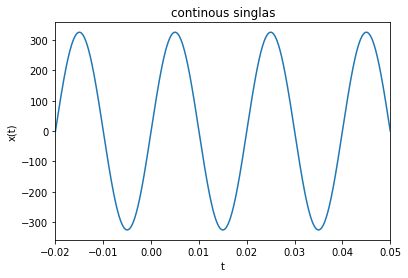

In [14]:
# continuous signals
t = np.linspace(-0.02, 0.05, 10000)
equation = 325 * np.sin(2*np.pi*50*t)
plt.figure()
plt.plot(t, equation)
plt.xlabel("t")
plt.ylabel("x(t)")
plt.xlim([-0.02, 0.05])
plt.title("continous singlas")
plt.show()


And also the discrete signals. Where n is sampled from 0 to 50. 




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  import sys


Text(0.5, 1.0, 'discrete signals')

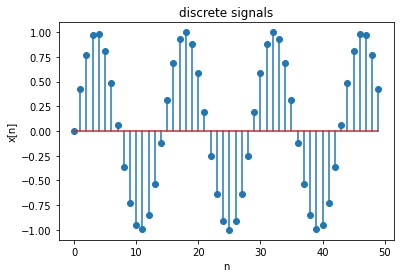

In [12]:
# discrete signals 
n = np.arange(50) # sampled from 0 to 50: x[50]
dt = (0.05-(-0.02))/50
x = np.sin(2*np.pi*50*n*dt)
plt.xlabel('n')
plt.ylabel('x[n]')
plt.stem(n, x, bottom = 0)
plt.title("discrete signals")

2.

(-0.02, 0.05)

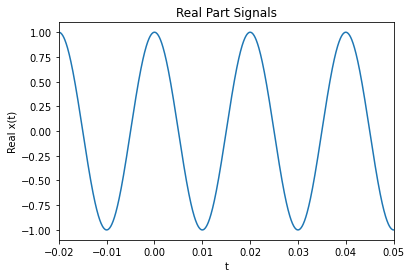

In [21]:
# real part
# np.exp(2j*np.pi*50*t).real. would return real parts
t = np.linspace(-0.02, 0.05, 1000)
plt.plot(t, np.exp(2j*np.pi*50*t).real)
plt.xlabel("t")
plt.ylabel('Real x(t)')
plt.title("Real Part Signals")
plt.xlim([-0.02, 0.05])

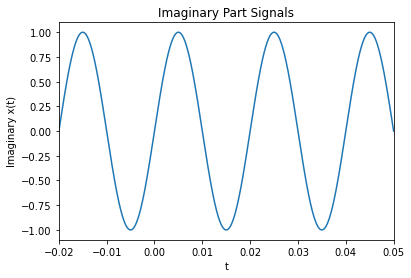

In [22]:
# imaginary part
# np.exp(2j*np.pi*50*t).imag. would return imaginary parts
plt.plot(t, np.exp(2j*np.pi*50*t).imag)
plt.xlabel('t')
plt.ylabel('Imaginary x(t)')
plt.title("Imaginary Part Signals")
plt.xlim([-0.02, 0.05]);
plt.show()

3.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.


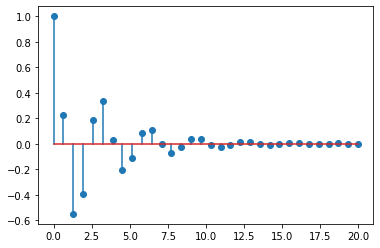

In [164]:
n = 32
t = np.linspace(0, 20, n)
x = np.exp(-t/3)*np.cos(2*t)
plt.stem(t, x) # stem plots vertical lines from a baseline to the y-coordinate and places a marker at the tip.
plt.show()

4.

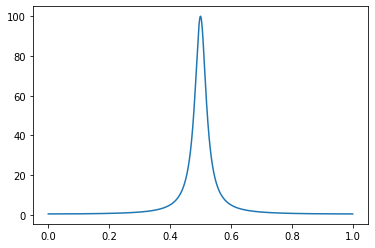

Error in callback <function flush_figures at 0x7fd02acacef0> (for post_execute):


KeyboardInterrupt: ignored

In [167]:
def function(t):
    return 1/ (1+.99 * cos(2*pi*t))

Taux = 10000 # Sample rate
T = 1 # duration
N = Taux * T # number of points

X = linspace(0,T,N, endpoint=False)
Y = function(X)

figure('exo 1A')
clf()
plot(X,Y)
Ytilde = fft(Y)

Freq = arange(N)
# The frequency is defined modulo N.
# We take values between -N/2 and N/2
Freq[Freq>=N/2] = Freq[Freq>=N/2] - N
Freq = Freq/T

figure('exo 1B')
clf()
loglog(Freq[1:N//2-1], abs(Ytilde)[1:N//2-1])


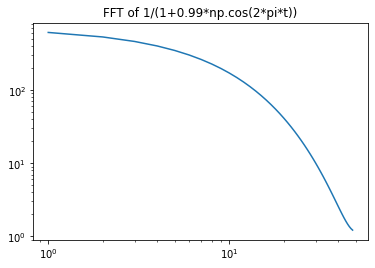

In [156]:
# define the equation first
def equation(t):
  return 1/(1+0.99*np.cos(2*pi*t))

sampleRate = 100 # the sample rate should at least be 100
duration = 1 # duration
numberOfPoints = sampleRate * duration 

x = linspace(0, duration, numberOfPoints, endpoint = False) # betewwn 0 to 1 with 100 samples
y = equation(x)

Ytilde = fft(y)
freq = arange(numberOfPoints)
# The frequency is defined modulo N.
# We take values between -N/2 and N/2
freq[freq >= numberOfPoints/2] = freq [freq >= numberOfPoints/2] - numberOfPoints
freq = freq / duration

plt.loglog(freq[1:numberOfPoints//2-1], abs(Ytilde)[1:numberOfPoints//2-1])
plt.title("FFT of 1/(1+0.99*np.cos(2*pi*t))")
plt.show()

5.

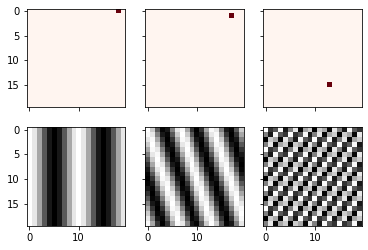

In [23]:
N = 20
f, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, sharex='col', sharey='row')
xf = np.zeros((N, N))
xf[0, N-2] = 1
Z = np.fft.ifft2(xf)
ax1.imshow(xf, cmap=cm.Reds)
ax4.imshow(np.real(Z), cmap = cm.gray)
xf = np.zeros((N, N))
xf[1, N-3] = 1
#xf[N-3, N-1] = 1
Z = np.fft.ifft2(xf)
ax2.imshow(xf, cmap = cm.Reds)
ax5.imshow(np.real(Z), cmap=cm.gray)
xf = np.zeros((N, N))
xf[-5, N-7] = 1
# xf[N-5, 7] = 1
Z = np.fft.ifft2(xf)
ax3.imshow(xf, cmap=cm.Reds)
ax6.imshow(np.real(Z), cmap=cm.gray)

plt.show()

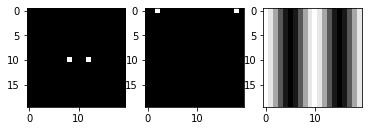

In [33]:
M = N = 20
xy = np.zeros((M, N))

u = 2
v = 0
xy[M//2-v, N//2+u] = 1
xy[M//2+v, N//2-u] = 1

plt.subplot(1,3,1)
plt.imshow(xy, cmap = "gray")
plt.subplot(1,3,2)
plt.imshow(np.fft.ifftshift(xy), cmap = "gray")
plt.title("shifted to center")
plt.subplot(1,3,3)
plt.imshow(np.fft.ifft2(np.fft.ifftshift(xy)).real, cmap = "gray")